In this project, a dataset containing census information from UCI’s Machine Learning Repository will be used to create a model to predict whether or not a person makes more than $50,000. The prediction model used here is a Random Forest Classifier. 
In this project all 14 features will be used in the model. The model might get more effective when done feature reduction prior to building the model (f.ex. by applying PCA to the data).


Dataset: https://archive.ics.uci.edu/dataset/2/adult

Additional Information

Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.

Additional Information

Listing of attributes:

>50K, <=50K.

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
col_names = ['age', 'workclass', 'fnlwgt','education', 'education-num', 
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']
df = pd.read_csv(r"C:\Users\Anwender\Desktop\archive\adult.data", names = col_names)
print(df.head(7))
print(df.columns)

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   
5   37            Private  284582     Masters             14   
6   49            Private  160187         9th              5   

           marital-status          occupation    relationship    race  \
0           Never-married        Adm-clerical   Not-in-family   White   
1      Married-civ-spouse     Exec-managerial         Husband   White   
2                Divorced   Handlers-cleaners   Not-in-family   White   
3      Married-civ-spouse   Handlers-cleaners         Husband   Black   
4      Married-civ-spouse      Prof-specialty            Wife   Black   
5      Married-civ-spouse     Exec-managerial    

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [4]:
print(df.education.dtype)
print(len(df.columns))
print(df.dtypes)
print(df.dtypes[1])
print(df.columns[1])
print(df[df.columns[1]])


object
15
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object
object
workclass
0                State-gov
1         Self-emp-not-inc
2                  Private
3                  Private
4                  Private
               ...        
32556              Private
32557              Private
32558              Private
32559              Private
32560         Self-emp-inc
Name: workclass, Length: 32561, dtype: object


Stripping the object - columns from possible whitespaces. 

In [5]:
for i in range(len(df.columns)):
    if df.dtypes[i] == "object":
        df[df.columns[i]] = df[df.columns[i]].str.strip()

print(df["native-country"].head())

0    United-States
1    United-States
2    United-States
3    United-States
4             Cuba
Name: native-country, dtype: object


Examine the distribution of the income variable ( percentage of people with an income more than/less than or equal to 50k)

In [6]:
print(df.income.value_counts(normalize = True))

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64


More than 3/4 of the income is less than or equal to 50k

Setting up feature and label variables for the Random Forest model

In [7]:
X = pd.get_dummies(df.iloc[: , 0:14], drop_first = True)
# print(X.head())

# print(df.income.head(10))
y = df["income"].apply(lambda x: 0 if x == "<=50K" else 1)
# print(y.head(10))

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

Creating model and computing accuracy score

In [9]:
rfc = RandomForestClassifier()

rfc.fit(X_train,y_train)

print(rfc.score(X_test,y_test))

0.8601259020420697


Tuning the model by examining the accuracy score with different max_depths

In [10]:
accuracy_train = []
accuracy_test = []

for i in range(25):
    rfci = RandomForestClassifier(max_depth = i + 1)
    rfci.fit(X_train, y_train)
    train_score = rfci.score(X_train, y_train)
    test_score = rfci.score(X_test, y_test)
    accuracy_train.append(train_score)
    accuracy_test.append(test_score)


In [11]:
print(accuracy_train)
print(accuracy_test)

[0.7560657248157249, 0.7663160319410319, 0.7923449017199017, 0.8233261670761671, 0.8412929975429976, 0.8487023955773956, 0.8506987100737101, 0.8581081081081081, 0.8611025798525799, 0.8632908476658476, 0.8683968058968059, 0.8713144963144963, 0.8758062039312039, 0.8794149262899262, 0.8856726044226044, 0.8922757985257985, 0.9002994471744472, 0.905213452088452, 0.9110488329238329, 0.9204545454545454, 0.9288237100737101, 0.9343135749385749, 0.9422220515970516, 0.949017199017199, 0.9542767199017199]
[0.7716873944418855, 0.7799785045294028, 0.8043912175648703, 0.8291110087517273, 0.8441578381698143, 0.8486104713649624, 0.8493781667434362, 0.8558268079226163, 0.8593582066635959, 0.8588975894365116, 0.8616612927990174, 0.8635037617073545, 0.8627360663288807, 0.8627360663288807, 0.8639643789344388, 0.8662674650698603, 0.8670351604483341, 0.8681099339781975, 0.8668816213726394, 0.8701059419622293, 0.868417012129587, 0.8665745432212498, 0.8667280822969445, 0.8671886995240289, 0.8668816213726394]


In [38]:
print(f"largest accuracy score: {max(accuracy_test)}, max depth: {accuracy_test.index(max(accuracy_test))+1}")

best_depth = accuracy_test.index(max(accuracy_test))+1
best_score = max(accuracy_test)

largest accuracy score: 0.8701059419622293, max depth: 20


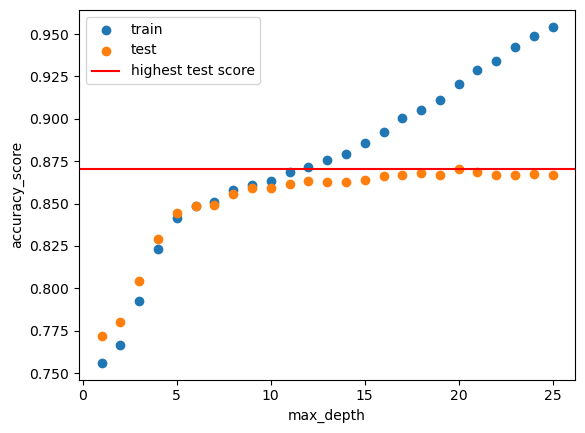

In [39]:
depth = [i for i in range(1,26)]

plt.scatter(depth, accuracy_train, label = "train")
plt.scatter(depth, accuracy_test, label = "test")
plt.axhline(y= best_score, color = "r", label = "highest test score")
plt.xlabel("max_depth")
plt.ylabel("accuracy_score")
plt.legend()
plt.show()

Refitting model with max_depth with highest accuracy score and extracting the 5 highest feature inportances

In [40]:
rfbest = RandomForestClassifier(max_depth = best_depth)

rfbest.fit(X_train, y_train)

feature_importances = rfbest.feature_importances_
print(feature_importances)

[1.03233946e-01 6.80570699e-02 7.47600885e-02 1.29604073e-01
 3.75751937e-02 6.53729390e-02 5.08217687e-03 4.75959217e-03
 4.04032595e-06 8.76156980e-03 7.29217610e-03 8.14948483e-03
 3.84075205e-03 1.24732602e-05 1.44763231e-03 5.25573838e-04
 1.76460839e-04 5.64260984e-04 1.88563745e-03 1.25853746e-03
 1.80827853e-03 2.09185241e-03 1.66801738e-02 3.92952685e-03
 5.87941087e-03 9.03809089e-03 6.55342716e-05 4.86681456e-03
 4.49498331e-03 5.28377015e-04 1.26462658e-01 1.42388966e-03
 4.76140075e-02 2.54577507e-03 2.64382033e-03 4.61329637e-03
 1.79314881e-05 4.25772587e-03 2.15051251e-02 3.91870697e-03
 2.70029390e-03 2.39864841e-03 9.79673650e-03 1.21040172e-04
 1.83246502e-02 2.29658114e-03 5.18659027e-03 3.70721163e-03
 3.00142779e-03 2.47187297e-02 2.50002766e-03 1.40312768e-02
 1.23381743e-02 1.06316121e-02 2.99538192e-03 4.35319110e-03
 9.04363532e-04 6.02877076e-03 2.30746022e-02 2.69596954e-04
 9.87366859e-04 6.27076267e-04 1.89390551e-04 6.75722549e-04
 2.04486081e-04 1.210286

In [15]:
# Saving the feature importances to a dataframe

feature_importance_df = pd.DataFrame(zip(X_train.columns, feature_importances), columns = ["Feature", "Importance"])
print(feature_importance_df)

# Extracting 5 most important features

top_5_df = feature_importance_df.sort_values("Importance", ascending = False).iloc[0:5]
print(top_5_df)


                           Feature  Importance
0                              age    0.117793
1                           fnlwgt    0.087126
2                    education-num    0.088077
3                     capital-gain    0.124864
4                     capital-loss    0.037631
..                             ...         ...
95         native-country_Thailand    0.000083
96  native-country_Trinadad&Tobago    0.000132
97    native-country_United-States    0.006727
98          native-country_Vietnam    0.000375
99       native-country_Yugoslavia    0.000243

[100 rows x 2 columns]
                              Feature  Importance
3                        capital-gain    0.124864
0                                 age    0.117793
30  marital-status_Married-civ-spouse    0.108553
2                       education-num    0.088077
1                              fnlwgt    0.087126


Grouping some of the education feature values together to see if this changes the model.

Groups: High school and less, College to Bachelor, Masters and more

This can be done by grouping the education numbers by their corresponding education. 
Below we can see that High School corresponds with the education number 9, College with the education number 10 asf:

In [18]:
print(df["education-num"].value_counts(), df["education"].value_counts())

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64 HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64


In [20]:
# Adding the new column
df["education_grouped"] = pd.cut(df["education-num"], [0,9,13,16], labels=["High School or less", "College to Bachelors", "Masters and more"])
print(df.education_grouped, df.education)

0        College to Bachelors
1        College to Bachelors
2         High School or less
3         High School or less
4        College to Bachelors
                 ...         
32556    College to Bachelors
32557     High School or less
32558     High School or less
32559     High School or less
32560     High School or less
Name: education_grouped, Length: 32561, dtype: category
Categories (3, object): ['High School or less' < 'College to Bachelors' < 'Masters and more'] 0         Bachelors
1         Bachelors
2           HS-grad
3              11th
4         Bachelors
            ...    
32556    Assoc-acdm
32557       HS-grad
32558       HS-grad
32559       HS-grad
32560       HS-grad
Name: education, Length: 32561, dtype: object


In [25]:
# Feature variables for the new model

X = pd.get_dummies(df.drop(["income"], axis = 1), drop_first = True)
#print(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [27]:
# Initiating and creating mode

# Starting with finding the best value for max_depth

new_acc_train = []
new_acc_test = []

for i in range(1,26):
    dt = DecisionTreeClassifier(max_depth = i)
    dt.fit(X_train,y_train)
    new_acc_train.append(dt.score(X_train,y_train))
    new_acc_test.append(dt.score(X_test,y_test))

print(new_acc_train)
print(new_acc_test)


[0.7560657248157249, 0.82754914004914, 0.843634828009828, 0.8440571253071253, 0.8521191646191646, 0.8563037469287469, 0.8586071867321867, 0.8608338452088452, 0.8644041769041769, 0.8694717444717445, 0.8743857493857494, 0.8802979115479116, 0.8872466216216216, 0.894617628992629, 0.9008369164619164, 0.9088221744471745, 0.9172681203931204, 0.926097972972973, 0.9333154176904177, 0.9398418304668305, 0.9465985872235873, 0.953585687960688, 0.9590755528255528, 0.965333230958231, 0.9707463144963145]
[0.7716873944418855, 0.8309534776600644, 0.844925533548288, 0.8446184553968985, 0.8526024873330262, 0.8545984953170582, 0.8558268079226163, 0.8585905112851221, 0.857976354982343, 0.8613542146476278, 0.8590511285122063, 0.8518347919545525, 0.8542914171656687, 0.8510670965760786, 0.8502994011976048, 0.8461538461538461, 0.8389375095961922, 0.8358667280822969, 0.8321817902656226, 0.8321817902656226, 0.8343313373253493, 0.831874712114233, 0.8292645478274221, 0.8268079226163059, 0.8251189927836634]


In [35]:
# Getting highest test score ancd accosiated max_depth

new_highest_acc = max(new_acc_test)
new_best_depth = new_acc_test.index(new_highest_acc) + 1


print(f"Highest test accuracy: {max(new_acc_test)}, best max depth: {new_acc_test.index(max(new_acc_test))+1}")

Highest test accuracy: 0.8613542146476278, best max depth: 10


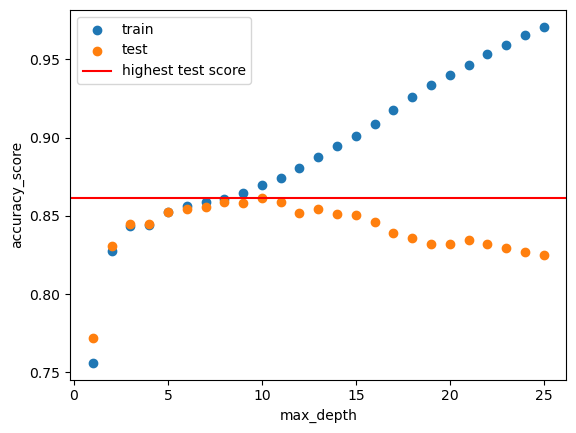

In [41]:
# Plotting the training and test accuracies against the depths

plt.scatter(depth, new_acc_train, label = "train")
plt.scatter(depth, new_acc_test, label = "test")
plt.axhline(y= new_highest_acc, color = "r", label = "highest test score")
plt.xlabel("max_depth")
plt.ylabel("accuracy_score")
plt.legend()
plt.show()

In [42]:
# Fitting the model with the new best max_depth

rf_new_best = RandomForestClassifier(max_depth = new_best_depth)

rf_new_best.fit(X_train,y_train)

# Saving the feature importances to a dataframe

feature_importance_df_new = pd.DataFrame(zip(X_train.columns, rf_new_best.feature_importances_), columns = ["Feature", "Importance"])
print(feature_importance_df_new)

# Extracting 5 most important features

top_5_df = feature_importance_df_new.sort_values("Importance", ascending = False).iloc[0:5]
print(top_5_df)

                                    Feature  Importance
0                                       age    0.065455
1                                    fnlwgt    0.011215
2                             education-num    0.109301
3                              capital-gain    0.144843
4                              capital-loss    0.034325
..                                      ...         ...
97             native-country_United-States    0.001921
98                   native-country_Vietnam    0.000156
99                native-country_Yugoslavia    0.000062
100  education_grouped_College to Bachelors    0.017795
101      education_grouped_Masters and more    0.044262

[102 rows x 2 columns]
                              Feature  Importance
30  marital-status_Married-civ-spouse    0.192242
3                        capital-gain    0.144843
2                       education-num    0.109301
32       marital-status_Never-married    0.070314
0                                 age    0.065455
